<a href="https://colab.research.google.com/github/Gopikanta/Machine-Learning---LAB/blob/main/Machine_Learning_ALM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Program no : 1
#Build a small Convolutional Neural Network (CNN) model using any of deep libraries for:

# a) Image Recognition/ Classification

!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes for classification

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
# Build a small Convolutional Neural Network (CNN) model using any of deep libraries for:
# b) Digit Identification
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                       

In [ ]:
# Program no: 2
# How to use Pre-trained CNN models for feature extraction.

!pip install tensorflow


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model

# Load a pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False)

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to perform feature extraction using the pre-trained model
def extract_features(img_array):
    features = base_model.predict(img_array)
    return features

# Path to an example image
image_path = '/content/alm.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(image_path)

# Extract features using the pre-trained VGG16 model
extracted_features = extract_features(img_array)

# Print the shape of the extracted features
print("Shape of extracted features:", extracted_features.shape)

# Optionally, you can flatten the features if you want a 1D representation
flattened_features = extracted_features.flatten()
print("Shape of flattened features:", flattened_features.shape)


1/1 [==============================] - 1s 1s/step
Shape of extracted features: (1, 7, 7, 512)
Shape of flattened features: (25088,)


In [ ]:
# Program no: 3
# Implementation of Pre-trained CNN models using transfer learning for classification/object detections.
# a) AlexNet
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def AlexNet(input_shape, num_classes):
    model = tf.keras.Sequential([
        Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Conv2D(256, kernel_size=(5,5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Conv2D(384, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(384, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define the number of classes in your dataset
num_classes = 10  # Change this according to your dataset

# Create AlexNet model
input_shape = (224, 224, 3)
model = AlexNet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'train_dir',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Print summary of the model
print(model.summary())

# Train the model
history = model.fit(train_generator, epochs=10)

# Print training history
print(history.history)

# Save the trained model
model.save('alexnet_transfer_learning_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('alexnet_transfer_learning_model.h5')


FileNotFoundError: [Errno 2] No such file or directory: 'train_dir'

In [ ]:
#Implementation of Pre-trained CNN models using transfer learning for classification/object detections.
#b) VGG-16
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Load pre-trained VGG16 model without classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

# Save the trained model
model.save('vgg16_transfer_learning_model_cifar10.h5')

58889256/58889256 [==============================] - 1s 0us/step


Epoch 1/10
1563/1563 [==============================] - 23s 11ms/step - loss: 1.4565 - accuracy: 0.4854 - val_loss: 1.4473 - val_accuracy: 0.4913
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2888 - accuracy: 0.5438 - val_loss: 1.2469 - val_accuracy: 0.5590
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2374 - accuracy: 0.5652 - val_loss: 1.3071 - val_accuracy: 0.5383
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1985 - accuracy: 0.5762 - val_loss: 1.3255 - val_accuracy: 0.5327
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1724 - accuracy: 0.5875 - val_loss: 1.1912 - val_accuracy: 0.5775
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1428 - accuracy: 0.5969 - val_loss: 1.2105 - val_accuracy: 0.5680
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1202 - accuracy: 0.6043 - val_loss: 1.2095 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Program no : 4
# Practicing various strategies of fine tuning.

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define hyperparameters grid for grid search
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.1, 0.01, 0.001],
    'classifier__kernel': ['linear', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found by grid search:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model on the test set:", accuracy)


Best parameters found by grid search:
{'classifier__C': 0.1, 'classifier__gamma': 0.1, 'classifier__kernel': 'linear'}
Accuracy of the best model on the test set: 0.88


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 72s 151ms/step - loss: 0.1950 - val_loss: 0.1376
Epoch 2/10
469/469 [==============================] - 58s 123ms/step - loss: 0.1301 - val_loss: 0.1228
Epoch 3/10
469/469 [==============================] - 59s 125ms/step - loss: 0.1201 - val_loss: 0.1157
Epoch 4/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1142 - val_loss: 0.1113
Epoch 5/10
469/469 [==============================] - 58s 123ms/step - loss: 0.1102 - val_loss: 0.1075
Epoch 6/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1073 - val_loss: 0.1048
Epoch 7/10
469/469 [==============================] - 58s 124ms/step - loss: 0.1052 - val_loss: 0.1038
Epoch 8/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1036 - val_loss: 0.1024
Epoch 9/10
469/469 [==============================] - 62s 133ms/step - loss: 0.1023 - val_loss: 0.1008
Epoch 10

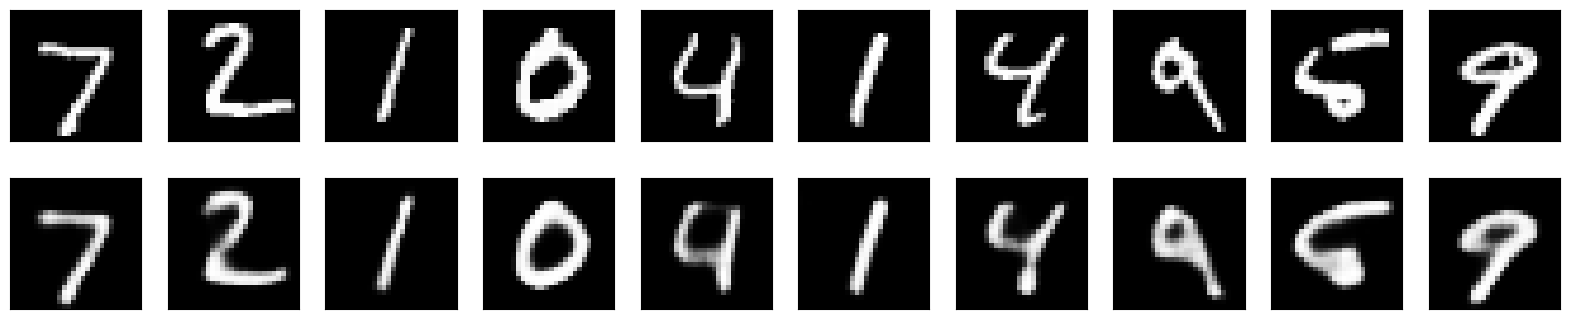

In [ ]:
#Program no : 5
#ImplementingGenerative Models:

# a) Autoencoder for image reconstruction
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset (MNIST in this case)
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to (28, 28, 1) for grayscale images
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images from the test set
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [ ]:
#Program no : 5
#ImplementingGenerative Models:
# b) Word Prediction using RNN
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text data for training
text_data = "The quick brown fox jumps over the lazy dog. The dog barks loudly."

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
total_words = len(tokenizer.word_index) + 1

# Create input sequences and labels
sequences = tokenizer.texts_to_sequences([text_data])[0]
input_sequences = []
for i in range(1, len(sequences)):
    n_gram_sequence = sequences[:i+1]
    input_sequences.append(n_gram_sequence)

# Pad sequences for input to RNN
max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Build the RNN model
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_length - 1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)

# Function to generate text given a seed word
def generate_text(seed_text, next_words, model, max_sequence_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]

        # Sample the word with the highest probability
        predicted_index = np.argmax(predicted_probs)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Generate text
seed_text = "The quick"
generated_text = generate_text(seed_text, next_words=10, model=model, max_sequence_length=max_sequence_length)
print(generated_text)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.4003 - accuracy: 0.1667
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 2.3937 - accuracy: 0.1667
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 2.3871 - accuracy: 0.1667
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 2.3803 - accuracy: 0.1667
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 2.3731 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 2.3655 - accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 2.3572 - accuracy: 0.3333
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 2.3480 - accuracy: 0.3333
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 2.3378 - accuracy: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 2.3262 - accuracy: 0.2500
Epoch 11/100
1/1 [===

In [ ]:
#Program no : 5
#ImplementingGenerative Models:
# c) Image Captioningimport tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import random

# Set the number of epochs
epochs = 10  # Adjust this number based on your needs

# Load pre-trained InceptionV3 model for image feature extraction
image_model = InceptionV3(weights='imagenet')
image_model = Model(image_model.input, image_model.layers[-2].output)

# Function to preprocess and extract features from an image
def extract_image_features(image_path):
    img = load_img(image_path, target_size=(299, 299))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = image_model.predict(img)
    features = np.reshape(features, features.shape[1])
    return features

# Load and preprocess text data for training
captions = [
    "A cat sitting on a windowsill",
    "A group of people playing soccer in a field",
    "A close-up of a beautiful flower",
    # Add more captions as needed
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1

# Create input sequences and labels for training
sequences = tokenizer.texts_to_sequences(captions)
input_sequences = []
for sequence in sequences:
    for i in range(1, len(sequence)):
        n_gram_sequence = sequence[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

# Build the image captioning model
image_input = Input(shape=(2048,))
image_embedding = Dense(256, activation='relu')(image_input)

text_input = Input(shape=(max_sequence_length-1,))
text_embedding = Embedding(input_dim=vocab_size, output_dim=50, input_length=max_sequence_length-1)(text_input)
text_lstm = LSTM(256)(text_embedding)

merged = tf.keras.layers.concatenate([image_embedding, text_lstm])
output = Dense(vocab_size, activation='softmax')(merged)

captioning_model = Model(inputs=[image_input, text_input], outputs=output)
captioning_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the image captioning model (you'll need actual image paths for this)
image_paths = [
    "/content/sem1.jpg",
    "/content/sem2.jpg",
    "/content/sem3.jpg",
    # Add more image paths as needed
]

for epoch in range(epochs):
    for image_path in image_paths:
        image_features = extract_image_features(image_path)
        random_caption = random.choice(captions)
        caption_sequence = tokenizer.texts_to_sequences([random_caption])[0]
        for i in range(1, len(caption_sequence)):
            partial_caption = pad_sequences([caption_sequence[:i]], maxlen=max_sequence_length-1, padding='pre')
            X_train = [np.array([image_features]), np.array(partial_caption)]
            y_train = to_categorical([caption_sequence[i]], num_classes=vocab_size)
            captioning_model.train_on_batch(X_train, y_train)

# Function to generate captions for new images
def generate_caption(image_path):
    image_features = extract_image_features(image_path)
    input_text = "startseq"
    for _ in range(max_sequence_length - 1):
        tokenized_text = tokenizer.texts_to_sequences([input_text])[0]
        padded_text = pad_sequences([tokenized_text], maxlen=max_sequence_length-1, padding='pre')
        X_gen = [np.array([image_features]), np.array(padded_text)]
        predicted_index = np.argmax(captioning_model.predict(X_gen), axis=-1)
        predicted_word = next(word for word, index in tokenizer.word_index.items() if index == predicted_index)
        if predicted_word == "endseq":
            break
        input_text += " " + predicted_word
    return input_text

# Generate captions for new images
new_image_path = "/content/sem4.jpg"
generated_caption = generate_caption(new_image_path)
print(generated_caption)


1/1 [==============================] - 0s 22ms/step
startseq cat sitting on a windowsill windowsill flower flower
